In [9]:
import pandas as pd

In [10]:
df_jibeali = pd.read_csv("jibeali.csv", index_col=[0])
df_memzer = pd.read_csv("memzer.csv", index_col=[0])
df_ummsequim = pd.read_csv("ummsequim.csv", index_col=[0])
df_dhawwharfage = pd.read_csv("dhawwharfage.csv", index_col=[0])
df_aljadaf = pd.read_csv("aljadaf.csv", index_col=[0])

In [11]:
df_memzer = df_memzer.iloc[:-3]

In [12]:
df_dhawwharfage = df_dhawwharfage.iloc[:-3]

In [13]:
areas = {
    'latitude': [
        24.99116365194032, 25.167098462417474, 25.326980376905343, 25.25541140810331, 25.20270651169005
    ],
    'longitude': [
        55.02641556330578, 55.205608423410666, 55.34307541851419, 55.31830829358669, 55.331553434737465
    ],
    'label': [
        'Jibe Ali', 'Umm Sequim', 'Memzer', 'Dhaw Wharfage', 'Al Jadaf'
    ]
}

In [14]:
df_jibeali['label'] = 'Jibe Ali'
df_memzer['label'] = 'Memzer'
df_ummsequim['label'] = 'Umm Sequim'
df_dhawwharfage['label'] = 'Dhaw Wharfage'
df_aljadaf['label'] = 'Al Jadaf'
df_jibeali = df_jibeali.rename(columns={'Jibe Ali (mm)': 'sea_level'})
df_memzer = df_memzer.rename(columns={'Memzer (mm)': 'sea_level'})
df_ummsequim = df_ummsequim.rename(columns={'Umm Sugeim (mm)': 'sea_level'})
df_dhawwharfage = df_dhawwharfage.rename(columns={'Dhaw Wharfage (mm)': 'sea_level'})
df_aljadaf = df_aljadaf.rename(columns={'Al Jadaf (mm)': 'sea_level'})

In [15]:
for df in [df_jibeali, df_memzer, df_ummsequim, df_dhawwharfage, df_aljadaf]:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month

In [16]:
coordinates = pd.DataFrame(areas)
merged_dfs = []

for df in [df_jibeali, df_memzer, df_ummsequim, df_dhawwharfage, df_aljadaf]:
    df = df.merge(coordinates, on='label')
    merged_dfs.append(df)

In [17]:
merged_dfs

[          Date  sea_level  Year     label  Month   latitude  longitude
 0   2004-01-31   2.311899  2004  Jibe Ali      1  24.991164  55.026416
 1   2004-02-29   2.328817  2004  Jibe Ali      2  24.991164  55.026416
 2   2004-03-31   2.325260  2004  Jibe Ali      3  24.991164  55.026416
 3   2004-04-30   2.365526  2004  Jibe Ali      4  24.991164  55.026416
 4   2004-05-31   2.438600  2004  Jibe Ali      5  24.991164  55.026416
 ..         ...        ...   ...       ...    ...        ...        ...
 317 2030-06-30   3.541244  2030  Jibe Ali      6  24.991164  55.026416
 318 2030-07-31   3.571769  2030  Jibe Ali      7  24.991164  55.026416
 319 2030-08-31   3.505914  2030  Jibe Ali      8  24.991164  55.026416
 320 2030-09-30   3.546285  2030  Jibe Ali      9  24.991164  55.026416
 321 2030-10-31   3.546194  2030  Jibe Ali     10  24.991164  55.026416
 
 [322 rows x 7 columns],
           Date  sea_level  Year   label  Month  latitude  longitude
 0   2004-01-31   1.703549  2004  Memzer

In [18]:
final_df = pd.concat(merged_dfs)

In [19]:
final_df

,Date,sea_level,Year,label,Month,latitude,longitude
0,2004-01-31,2.311899,2004,Jibe Ali,1,24.991164,55.026416
1,2004-02-29,2.328817,2004,Jibe Ali,2,24.991164,55.026416
2,2004-03-31,2.325260,2004,Jibe Ali,3,24.991164,55.026416
3,2004-04-30,2.365526,2004,Jibe Ali,4,24.991164,55.026416
4,2004-05-31,2.438600,2004,Jibe Ali,5,24.991164,55.026416
...,...,...,...,...,...,...,...
319,2030-08-31,3.527937,2030,Al Jadaf,8,25.202707,55.331553
320,2030-09-30,3.604894,2030,Al Jadaf,9,25.202707,55.331553
321,2030-10-31,3.585250,2030,Al Jadaf,10,25.202707,55.331553
322,2030-11-30,3.546670,2030,Al Jadaf,11,25.202707,55.331553


In [20]:
final_df = final_df[['latitude', 'longitude', 'Year', 'Month', 'sea_level']]

In [21]:
final_df.reset_index(inplace=True, drop=True)

In [22]:
final_df

,latitude,longitude,Year,Month,sea_level
0,24.991164,55.026416,2004,1,2.311899
1,24.991164,55.026416,2004,2,2.328817
2,24.991164,55.026416,2004,3,2.325260
3,24.991164,55.026416,2004,4,2.365526
4,24.991164,55.026416,2004,5,2.438600
...,...,...,...,...,...
1613,25.202707,55.331553,2030,8,3.527937
1614,25.202707,55.331553,2030,9,3.604894
1615,25.202707,55.331553,2030,10,3.585250
1616,25.202707,55.331553,2030,11,3.546670


In [23]:
features = ['latitude','longitude','Year']
target = 'sea_level'

In [27]:
from pycaret.regression import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# final_df.drop(columns=['index'],inplace=True)

In [24]:
final_df = final_df[['latitude', 'longitude', 'Year', 'sea_level']]

In [25]:
mean_values = final_df.groupby(['latitude', 'longitude', 'Year'])['sea_level'].mean().reset_index()

In [26]:
mean_values

,latitude,longitude,Year,sea_level
0,24.991164,55.026416,2004,2.444723
1,24.991164,55.026416,2005,1.037368
2,24.991164,55.026416,2006,1.078328
3,24.991164,55.026416,2007,1.159470
4,24.991164,55.026416,2008,1.114656
...,...,...,...,...
130,25.326980,55.343075,2026,2.156015
131,25.326980,55.343075,2027,2.936692
132,25.326980,55.343075,2028,1.887315
133,25.326980,55.343075,2029,2.995458


## 1. KNN 
## 2. Random Forest Models

In [73]:
regression_setup = setup(data = mean_values, target = target, session_id=1, normalize = True)

,Description,Value
0,Session id,1
1,Target,sea_level
2,Target type,Regression
3,Original data shape,"(135, 4)"
4,Transformed data shape,"(135, 4)"
5,Transformed train set shape,"(94, 4)"
6,Transformed test set shape,"(41, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [74]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.3514,0.5418,0.5956,0.5258,0.1816,0.1940,0.0300
catboost,CatBoost Regressor,0.3185,0.6664,0.5693,0.4431,0.1634,0.1778,1.0400
rf,Random Forest Regressor,0.2873,0.6919,0.5586,0.4343,0.1567,0.1546,0.0960
ridge,Ridge Regression,0.5230,0.5656,0.6786,0.3896,0.2005,0.2643,0.0230
br,Bayesian Ridge,0.5263,0.5635,0.6787,0.3884,0.2003,0.2647,0.0220
huber,Huber Regressor,0.5163,0.5601,0.6762,0.3873,0.1987,0.2566,0.0150
lr,Linear Regression,0.5348,0.5620,0.6817,0.3800,0.2004,0.2659,2.1750
lar,Least Angle Regression,0.5348,0.5620,0.6817,0.3800,0.2004,0.2659,0.0160
et,Extra Trees Regressor,0.3316,0.7464,0.6125,0.3540,0.1766,0.1935,0.1770
lightgbm,Light Gradient Boosting Machine,0.5784,0.6744,0.7302,0.2758,0.2150,0.2823,0.3110


KNeighborsRegressor(n_jobs=-1)

In [76]:
knn = create_model('knn')
tuned_knn = tune_model(knn)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3335,0.3133,0.5597,0.6121,0.2059,0.2698
1,0.2677,0.2470,0.4970,0.6799,0.1687,0.1535
2,0.2491,0.1929,0.4392,0.6423,0.1430,0.1175
3,0.1668,0.0590,0.2430,0.8604,0.0723,0.0714
4,0.0970,0.0320,0.1790,0.9201,0.0581,0.0403
5,0.6343,0.8508,0.9224,-0.1264,0.2859,0.3057
6,0.8825,2.8233,1.6803,-0.1505,0.3748,0.3075
7,0.5358,0.6982,0.8356,0.1906,0.2934,0.4528
8,0.2250,0.1636,0.4045,0.7619,0.1536,0.1708


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4837,0.4600,0.6782,0.4304,0.2492,0.3751
1,0.3157,0.1789,0.4230,0.7681,0.1471,0.1811
2,0.2951,0.2121,0.4605,0.6068,0.1455,0.1262
3,0.2146,0.0649,0.2548,0.8465,0.0758,0.0914
4,0.1715,0.0382,0.1955,0.9048,0.0553,0.0659
5,0.7083,0.7787,0.8824,-0.0308,0.2739,0.3696
6,0.9017,2.7080,1.6456,-0.1034,0.3674,0.3355
7,0.5479,0.5781,0.7603,0.3299,0.2809,0.4566
8,0.3429,0.2162,0.4650,0.6853,0.1737,0.2330


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [227]:
# catboost = create_model('catboost')
# tuned_catboost = tune_model(catboost)

In [80]:
rf = create_model('rf')
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1290,0.0322,0.1794,0.9602,0.0694,0.0836
1,0.1625,0.0925,0.3042,0.8801,0.0922,0.0774
2,0.1328,0.0651,0.2551,0.8794,0.0916,0.0786
3,0.1651,0.0610,0.2469,0.8558,0.0706,0.0657
4,0.0513,0.0075,0.0865,0.9813,0.0280,0.0211
5,0.2886,0.1764,0.4200,0.7665,0.1125,0.1274
6,0.7741,3.5458,1.8830,-0.4448,0.4411,0.1851
7,0.8579,2.7809,1.6676,-2.2237,0.4672,0.7574
8,0.1909,0.1166,0.3415,0.8303,0.1297,0.0991


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4013,0.3157,0.5619,0.6091,0.2147,0.3133
1,0.2987,0.1381,0.3716,0.8210,0.1272,0.1613
2,0.4118,0.2705,0.5201,0.4986,0.1596,0.1705
3,0.3280,0.1186,0.3444,0.7195,0.0974,0.1294
4,0.1953,0.0481,0.2192,0.8802,0.0605,0.0738
5,0.5550,0.4390,0.6626,0.4189,0.2061,0.2784
6,0.8221,2.6594,1.6308,-0.0837,0.3602,0.3032
7,0.5194,0.6417,0.8010,0.2562,0.2846,0.4399
8,0.3299,0.1574,0.3967,0.7710,0.1486,0.2068


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [418]:
predict_model(tuned_knn)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,0.4576,0.4678,0.6839,0.3339,0.2250,0.2874


,latitude,longitude,Year,sea_level,prediction_label
42,25.167099,55.205608,2019,2.006710,2.026718
36,25.167099,55.205608,2013,2.413565,2.219348
93,25.255411,55.318310,2016,2.807263,2.944447
5,24.991163,55.026417,2009,1.114021,2.358756
65,25.202707,55.331554,2015,3.106131,3.180867
108,25.326981,55.343075,2004,1.826075,1.476619
56,25.202707,55.331554,2006,1.090378,2.093828
17,24.991163,55.026417,2021,3.389699,3.136526
53,25.167099,55.205608,2030,2.032428,2.242137
120,25.326981,55.343075,2016,2.584873,2.110117


In [419]:
predict_model(tuned_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.4420,0.3684,0.6069,0.4755,0.1971,0.2603


,latitude,longitude,Year,sea_level,prediction_label
42,25.167099,55.205608,2019,2.006710,2.239281
36,25.167099,55.205608,2013,2.413565,2.241467
93,25.255411,55.318310,2016,2.807263,3.110788
5,24.991163,55.026417,2009,1.114021,1.798148
65,25.202707,55.331554,2015,3.106131,3.229839
108,25.326981,55.343075,2004,1.826075,1.580279
56,25.202707,55.331554,2006,1.090378,1.979704
17,24.991163,55.026417,2021,3.389699,3.154705
53,25.167099,55.205608,2030,2.032428,2.325537
120,25.326981,55.343075,2016,2.584873,2.184454


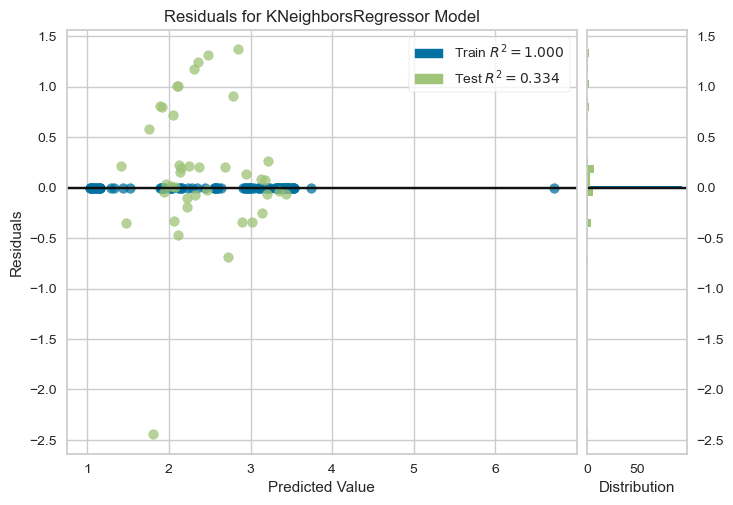

In [77]:
plot_model(tuned_knn)

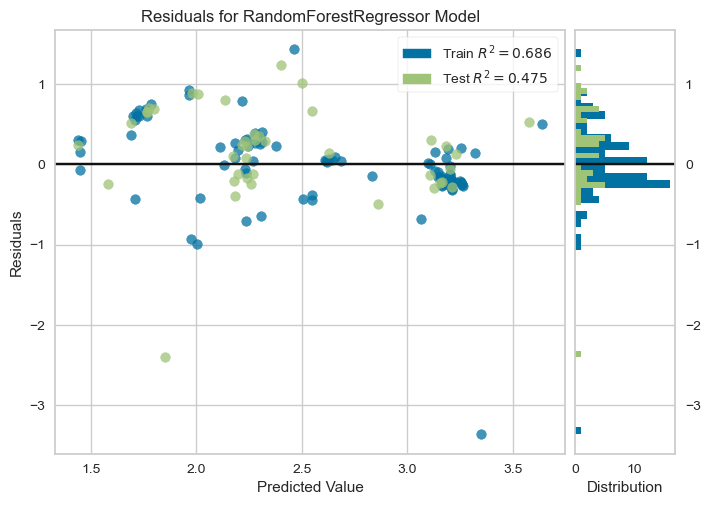

In [81]:
plot_model(tuned_rf)

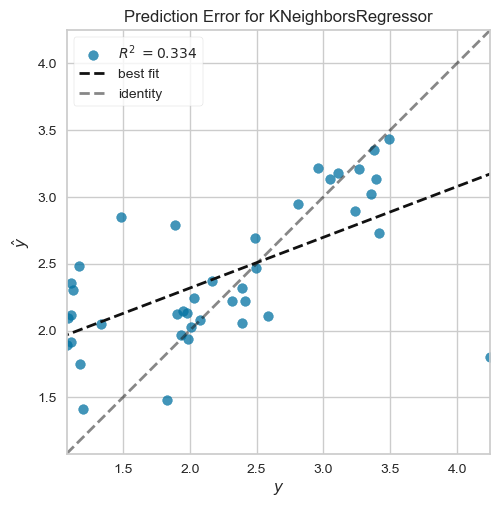

In [228]:
plot_model(tuned_knn, plot = 'error')

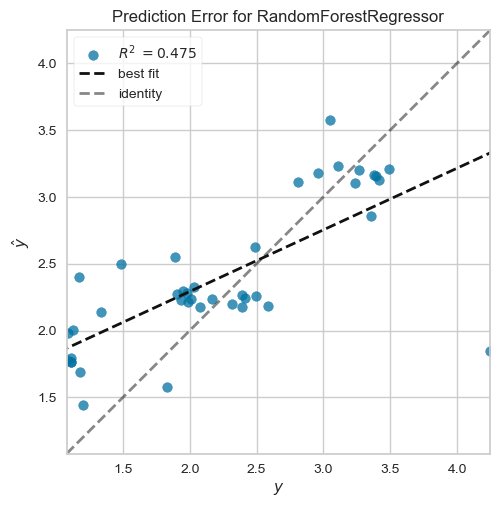

In [82]:
plot_model(tuned_rf, plot = 'error')

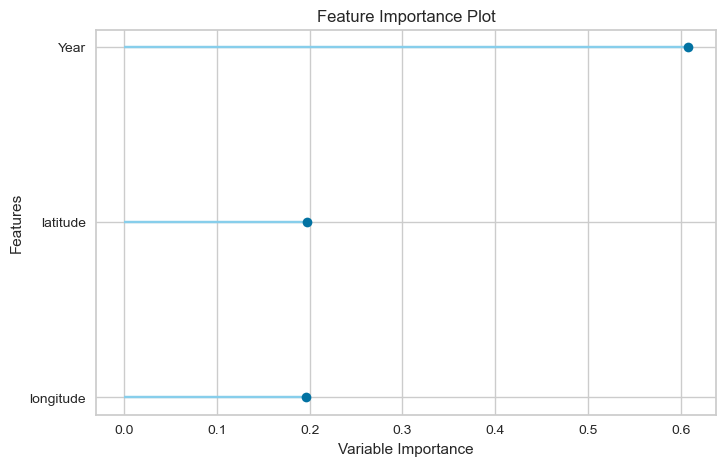

In [84]:
plot_model(tuned_rf, plot='feature')

In [409]:
data = {
    'latitude': [
        24.92164390301424, 24.932078897264983, 24.948599164733835, 24.96163991611452, 24.972071522567468,
        24.973810037664204, 24.979894647016028, 24.98597895534748, 24.989455567792806, 24.997277586297336,
        25.001622937016393, 25.011182167618376, 25.022478480902407, 25.026822940007385, 25.02942954165098,
        25.031167245319367, 25.025954060489187, 25.038117813880337, 25.047674202568388, 25.06591614892431,
        25.081549941279036, 25.083286906104032, 25.085892307127214, 25.097845775147377, 25.095871238708746,
        25.138810211456878, 25.15632695112367, 25.16175416301694, 25.175321136200676, 25.194847731601175,
        25.199150470750627, 25.20584331833122, 25.21253579794449, 25.218032916591017, 25.216837911924944,
        25.222812817873514, 25.22352978686614, 25.211818764159965, 25.22352978686614, 25.230938218969158,
        25.241213683950264, 25.252309595672934, 25.281401935760176, 25.28422395588819, 25.271198699923612,
        25.281401935760176, 25.2775154439949, 25.267135692149306, 25.265698425774794, 25.267614777159288,
        25.259150663637193, 25.255796795070808, 25.25036652578994, 25.24365821095606, 25.235991111953037,
        25.233435304811614, 25.225927310615347, 25.204678773050006, 25.202601649274147, 25.1950917522728,
        25.21138923840782, 25.225288310980925, 25.235352165205136, 25.24844990220322, 25.256435634319605,
        25.267934166115488, 25.266816301092234, 25.28179523884177, 25.291604313501814, 25.31526184295937,
        25.316997994508085, 25.30484441844634, 25.312657571593107, 25.333924157510477, 25.354536158997604,
        25.3404335900229, 25.32567837369783, 25.326980376905343
    ],
    'longitude': [
        54.90643959954837, 54.916028684796345, 54.9390424893915, 54.956302842837864, 54.96589192808584,
        54.9802755559578, 54.991782458255386, 55.00520717760255, 55.01863189694973, 55.0310977077721,
        55.03972788449528, 55.04356351859447, 55.04164570154488, 55.05027587826805, 55.06274168909043,
        55.06657732318962, 55.07616640843761, 55.087673310735184, 55.09726239598315, 55.11548165795431,
        55.11644056647912, 55.126988560251895, 55.13370091992548, 55.135572789404065, 55.14592960304592,
        55.183541189429455, 55.19199016897938, 55.20180188716639, 55.21215870080824, 55.22816002593331,
        55.230801803434616, 55.22948091468396, 55.23291522543565, 55.2323868699354, 55.22419735968137,
        55.22631078168241, 55.234236114186295, 55.24189726894006, 55.2485017126933, 55.247709179442914,
        55.246916646192524, 55.257128533086096, 55.255207932303065, 55.26601131170763, 55.27345363974188,
        55.287858145614635, 55.294768989369025, 55.29141377681865, 55.29247331762404, 55.30130282433554,
        55.31207482252355, 55.31595980547661, 55.323376591114275, 55.32779134447002, 55.33132314715462,
        55.335561310376136, 55.3442142269534, 55.33202950769154, 55.32514249245657, 55.33344222876537,
        55.348275800040696, 55.34721625923531, 55.337503801852655, 55.3288508852754, 55.31896183775852,
        55.303775086214756, 55.292120137355575, 55.29298317345789, 55.288818446006154, 55.280175742482506,
        55.28425701953378, 55.30874467951747, 55.31330610637717, 55.290498972078645, 55.290498972078645,
        55.31666715774747, 55.33083158852235, 55.34307541851419
    ]
}

df = pd.DataFrame(data)

In [410]:
df['Year'] = 2050

In [411]:
tuned_knn


KNeighborsRegressor(metric='manhattan', n_jobs=-1, n_neighbors=18,
                    weights='distance')

In [412]:
from pycaret.regression import load_model, predict_model
predictions_rf = predict_model(tuned_rf, data=df)
predictions_knn = predict_model(tuned_knn, data=df)

In [434]:
save_model(tuned_rf, 'FINAL_tunedRandomForest.keras')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['latitude', 'longitude', 'Year'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model',
                  RandomForestRegressor(max_depth=7, max_features='log2',
                                        min_impurity_decrease=0.02,
                                        min_samples_leaf=2, n_estimators=210,
                                        n_jobs=-1, random_state=1))]),
 'FINAL_tunedRandomForest.keras.pkl')

In [435]:
save_model(tuned_knn, 'FINAL_tunedKNN.keras')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['latitude', 'longitude', 'Year'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model',
                  KNeighborsRegressor(metric='manhattan', n_jobs=-1,
                                      n_neighbors=18, weights='distance'))]),
 'FINAL_tunedKNN.keras.pkl')

In [413]:
predictions_rf


,latitude,longitude,Year,prediction_label
0,24.921644,54.906441,2050,3.262482
1,24.932079,54.916027,2050,3.262482
2,24.948599,54.939041,2050,3.262482
3,24.961639,54.956303,2050,3.262482
4,24.972071,54.965893,2050,3.262482
...,...,...,...,...
73,25.333923,55.290501,2050,2.885418
74,25.354536,55.290501,2050,2.885418
75,25.340433,55.316666,2050,2.885418
76,25.325678,55.330833,2050,2.896984


In [414]:
predictions_knn

,latitude,longitude,Year,prediction_label
0,24.921644,54.906441,2050,3.055540
1,24.932079,54.916027,2050,3.058203
2,24.948599,54.939041,2050,3.063960
3,24.961639,54.956303,2050,3.068942
4,24.972071,54.965893,2050,3.072574
...,...,...,...,...
73,25.333923,55.290501,2050,2.983381
74,25.354536,55.290501,2050,2.983676
75,25.340433,55.316666,2050,2.983104
76,25.325678,55.330833,2050,2.980527


In [415]:
predictions_rf.nunique()

latitude            76
longitude           77
Year                 1
prediction_label    14
dtype: int64

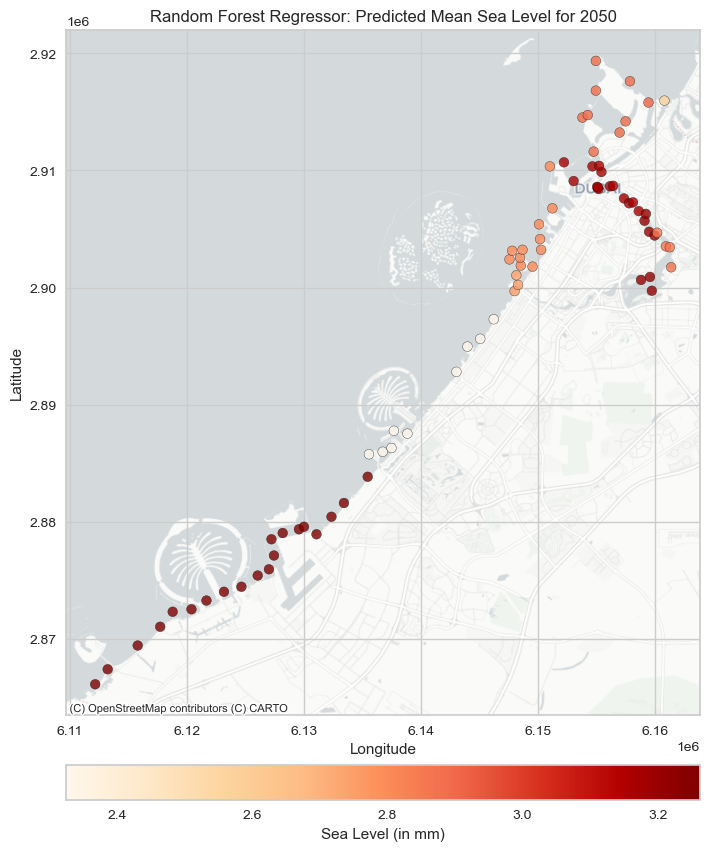

In [416]:
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

gdf_predictions = gpd.GeoDataFrame(
    predictions_rf,
    geometry=gpd.points_from_xy(predictions_rf['longitude'], predictions_rf['latitude']),
    crs="EPSG:4326"  
)

gdf_predictions = gdf_predictions.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.5)

gdf_predictions.plot(ax=ax, marker='o', column='prediction_label', cmap = 'OrRd',
                     legend=True, alpha=0.8, edgecolor='k', cax=cax,legend_kwds={"label": "Sea Level (in mm)", "orientation": "horizontal"})

cx.add_basemap(ax, crs=gdf_predictions.crs.to_string(), source=cx.providers.CartoDB.Positron)

ax.set_title('Random Forest Regressor: Predicted Mean Sea Level for 2050')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


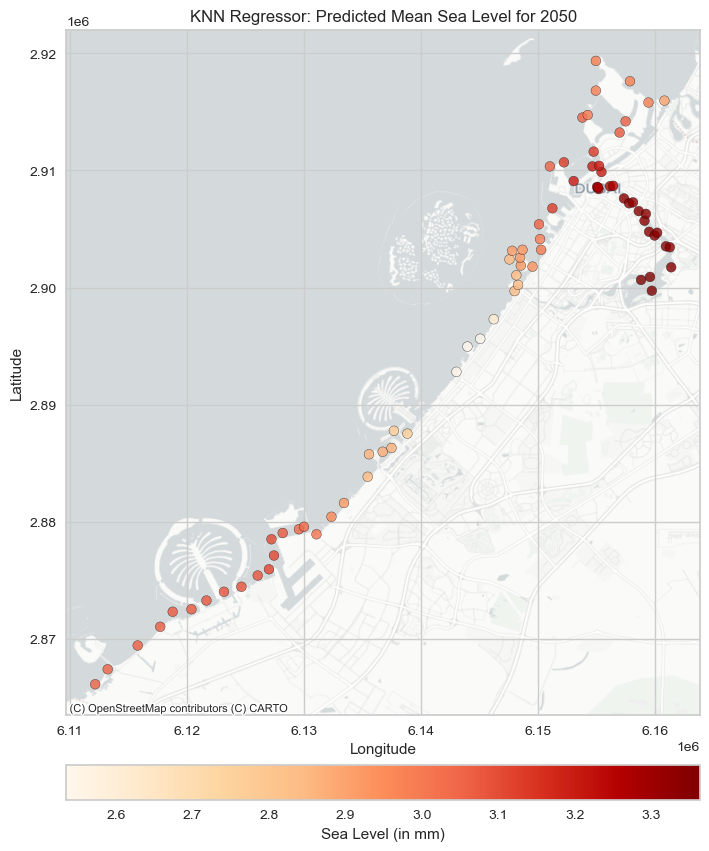

In [417]:
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

gdf_predictions = gpd.GeoDataFrame(
    predictions_knn,
    geometry=gpd.points_from_xy(predictions_knn['longitude'], predictions_knn['latitude']),
    crs="EPSG:4326"  
)

gdf_predictions = gdf_predictions.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.5)
gdf_predictions.plot(ax=ax, marker='o', column='prediction_label', cmap = 'OrRd',
                     legend=True, alpha=0.8, edgecolor='k', cax=cax,legend_kwds={"label": "Sea Level (in mm)", "orientation": "horizontal"})

cx.add_basemap(ax, crs=gdf_predictions.crs.to_string(), source=cx.providers.CartoDB.Positron)

ax.set_title('KNN Regressor: Predicted Mean Sea Level for 2050')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


## 3. Deep Learning Model

In [27]:
X = mean_values[features]
y = mean_values[target]

In [28]:
X

,latitude,longitude,Year
0,24.991164,55.026416,2004
1,24.991164,55.026416,2005
2,24.991164,55.026416,2006
3,24.991164,55.026416,2007
4,24.991164,55.026416,2008
...,...,...,...
130,25.326980,55.343075,2026
131,25.326980,55.343075,2027
132,25.326980,55.343075,2028
133,25.326980,55.343075,2029


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [296]:
X_train.shape

(108, 3)

In [297]:
y_train.shape

(108,)

In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

import keras
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from keras.optimizers import Adam
from keras import regularizers

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasRegressor

from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
import pickle
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [319]:
X_train.shape

(108, 3)

In [390]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', activity_regularizer=regularizers.l2(1e-5)),  
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', activity_regularizer=regularizers.l2(1e-5)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='relu')
])

model.compile(optimizer = Adam(learning_rate=0.001), loss = "mean_squared_error",
                  metrics= ['mse', "mape","mae"])

In [400]:
model.summary()

Model: "sequential_675"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1024 (Dense)                   │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_549 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1025 (Dense)                   │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_550 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1026 (Dense)                   │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,461 (201.02 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,308 (134.02 KB)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_valid = scaler.transform(X_valid)

In [393]:
history = model.fit(scaled_X_train, y_train, epochs=5000, validation_data=(scaled_X_valid, y_valid), batch_size=64)

Epoch 1/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 411ms/step - loss: 7.0447 - mae: 2.4709 - mape: 97.9250 - mse: 7.0427 - val_loss: 6.0196 - val_mae: 2.3183 - val_mape: 96.4879 - val_mse: 6.0190
Epoch 2/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 6.5910 - mae: 2.3813 - mape: 93.3214 - mse: 6.5890 - val_loss: 5.3893 - val_mae: 2.1760 - val_mape: 89.5131 - val_mse: 5.3887
Epoch 3/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.8395 - mae: 2.2458 - mape: 88.7074 - mse: 5.8374 - val_loss: 4.8071 - val_mae: 2.0342 - val_mape: 82.5611 - val_mse: 4.8065
Epoch 4/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 5.1993 - mae: 2.0731 - mape: 80.3431 - mse: 5.1972 - val_loss: 4.2553 - val_mae: 1.8883 - val_mape: 75.3856 - val_mse: 4.2546
Epoch 5/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4.8327 - mae: 1.9716 - mape: 74.0084 - mse: 4.8304 - val_loss: 3.7141 - val_mae: 1.7321 - val_mape: 67.7515 - val_mse: 3.7134
Epoch 6/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 3.8248 - mae: 1

In [262]:
history.history.keys()

dict_keys(['loss', 'mape', 'mse', 'val_loss', 'val_mape', 'val_mse'])

In [423]:
pred_X_valid = model.predict(scaled_X_valid)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [426]:
pred_X_test = model.predict(scaled_X_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [428]:
r2_score(y_train, pred_X_test)

0.8001593261671794

In [424]:
from sklearn.metrics import r2_score
r2_score(y_valid, pred_X_valid)

0.687558184820241

In [401]:
# loss, mae = model.evaluate(X_valid, y_valid)
print(f"Mean Absolute Error: {history.history['val_mse'][-1:]}")
print(f"Val Loss: {history.history['val_mape'][-1:]}")

Mean Absolute Error: [0.21432475745677948]
Val Loss: [14.387321472167969]


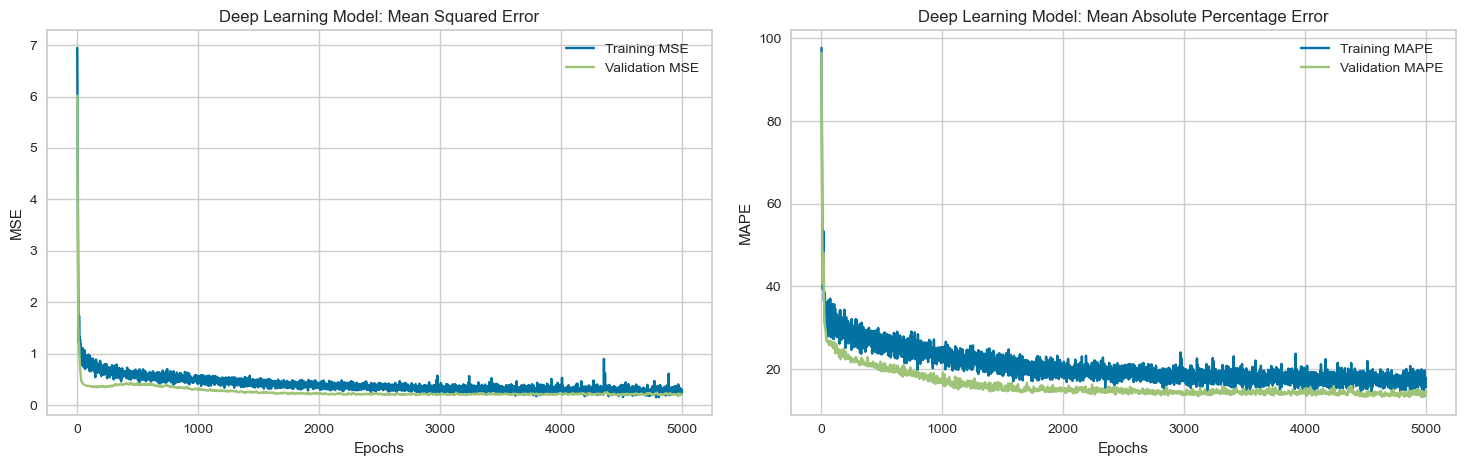

In [396]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the training and validation loss on the first subplot
ax[0].plot(history.history['loss'], label='Training MSE')
ax[0].plot(history.history['val_loss'], label='Validation MSE')
ax[0].set_title('Deep Learning Model: Mean Squared Error')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('MSE')
ax[0].legend()

# Plot the training and validation MAE on the second subplot
ax[1].plot(history.history['mape'], label='Training MAPE')
ax[1].plot(history.history['val_mape'], label='Validation MAPE')
ax[1].set_title('Deep Learning Model: Mean Absolute Percentage Error')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('MAPE')
ax[1].legend()

plt.tight_layout()
plt.show()


In [431]:
model.save("FINAL_finalproj_deeplearningmodel.keras")

In [33]:
from tensorflow.keras.models import load_model
model = load_model('FINAL_finalproj_deeplearningmodel.keras', safe_mode=False)

In [34]:
import pandas as pd
import numpy as np
from keras.models import load_model
import plotly.graph_objects as go

data = {
    'latitude': [
        24.92164390301424, 24.932078897264983, 24.948599164733835, 24.96163991611452, 24.972071522567468,
        24.973810037664204, 24.979894647016028, 24.98597895534748, 24.989455567792806, 24.997277586297336,
        25.001622937016393, 25.011182167618376, 25.022478480902407, 25.026822940007385, 25.02942954165098,
        25.031167245319367, 25.025954060489187, 25.038117813880337, 25.047674202568388, 25.06591614892431,
        25.081549941279036, 25.083286906104032, 25.085892307127214, 25.097845775147377, 25.095871238708746,
        25.138810211456878, 25.15632695112367, 25.16175416301694, 25.175321136200676, 25.194847731601175,
        25.199150470750627, 25.20584331833122, 25.21253579794449, 25.218032916591017, 25.216837911924944,
        25.222812817873514, 25.22352978686614, 25.211818764159965, 25.22352978686614, 25.230938218969158,
        25.241213683950264, 25.252309595672934, 25.281401935760176, 25.28422395588819, 25.271198699923612,
        25.281401935760176, 25.2775154439949, 25.267135692149306, 25.265698425774794, 25.267614777159288,
        25.259150663637193, 25.255796795070808, 25.25036652578994, 25.24365821095606, 25.235991111953037,
        25.233435304811614, 25.225927310615347, 25.204678773050006, 25.202601649274147, 25.1950917522728,
        25.21138923840782, 25.225288310980925, 25.235352165205136, 25.24844990220322, 25.256435634319605,
        25.267934166115488, 25.266816301092234, 25.28179523884177, 25.291604313501814, 25.31526184295937,
        25.316997994508085, 25.30484441844634, 25.312657571593107, 25.333924157510477, 25.354536158997604,
        25.3404335900229, 25.32567837369783, 25.326980376905343
    ],
    'longitude': [
        54.90643959954837, 54.916028684796345, 54.9390424893915, 54.956302842837864, 54.96589192808584,
        54.9802755559578, 54.991782458255386, 55.00520717760255, 55.01863189694973, 55.0310977077721,
        55.03972788449528, 55.04356351859447, 55.04164570154488, 55.05027587826805, 55.06274168909043,
        55.06657732318962, 55.07616640843761, 55.087673310735184, 55.09726239598315, 55.11548165795431,
        55.11644056647912, 55.126988560251895, 55.13370091992548, 55.135572789404065, 55.14592960304592,
        55.183541189429455, 55.19199016897938, 55.20180188716639, 55.21215870080824, 55.22816002593331,
        55.230801803434616, 55.22948091468396, 55.23291522543565, 55.2323868699354, 55.22419735968137,
        55.22631078168241, 55.234236114186295, 55.24189726894006, 55.2485017126933, 55.247709179442914,
        55.246916646192524, 55.257128533086096, 55.255207932303065, 55.26601131170763, 55.27345363974188,
        55.287858145614635, 55.294768989369025, 55.29141377681865, 55.29247331762404, 55.30130282433554,
        55.31207482252355, 55.31595980547661, 55.323376591114275, 55.32779134447002, 55.33132314715462,
        55.335561310376136, 55.3442142269534, 55.33202950769154, 55.32514249245657, 55.33344222876537,
        55.348275800040696, 55.34721625923531, 55.337503801852655, 55.3288508852754, 55.31896183775852,
        55.303775086214756, 55.292120137355575, 55.29298317345789, 55.288818446006154, 55.280175742482506,
        55.28425701953378, 55.30874467951747, 55.31330610637717, 55.290498972078645, 55.290498972078645,
        55.31666715774747, 55.33083158852235, 55.34307541851419
    ]
}

df = pd.DataFrame(data)

input_data = df[['latitude', 'longitude']]
input_data['Year'] = 2050

input_data = input_data.values.astype(float)
scaled_input_data = scaler.transform(input_data)

# Predicting mean sea level for each latitude and longitude
predictions_nn = model.predict(scaled_input_data)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


C:\Users\Durga\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [35]:
len(predictions_nn)

78

In [36]:
input_df = pd.DataFrame(input_data, columns = ['latitude','longitude','Year'])

input_df['prediction_label'] = predictions_nn
input_df

,latitude,longitude,Year,prediction_label
0,24.921644,54.906440,2050.0,4.011473
1,24.932079,54.916029,2050.0,3.983086
2,24.948599,54.939042,2050.0,3.984556
3,24.961640,54.956303,2050.0,3.978277
4,24.972072,54.965892,2050.0,3.948441
...,...,...,...,...
73,25.333924,55.290499,2050.0,3.129102
74,25.354536,55.290499,2050.0,2.985610
75,25.340434,55.316667,2050.0,3.290759
76,25.325678,55.330832,2050.0,3.507067


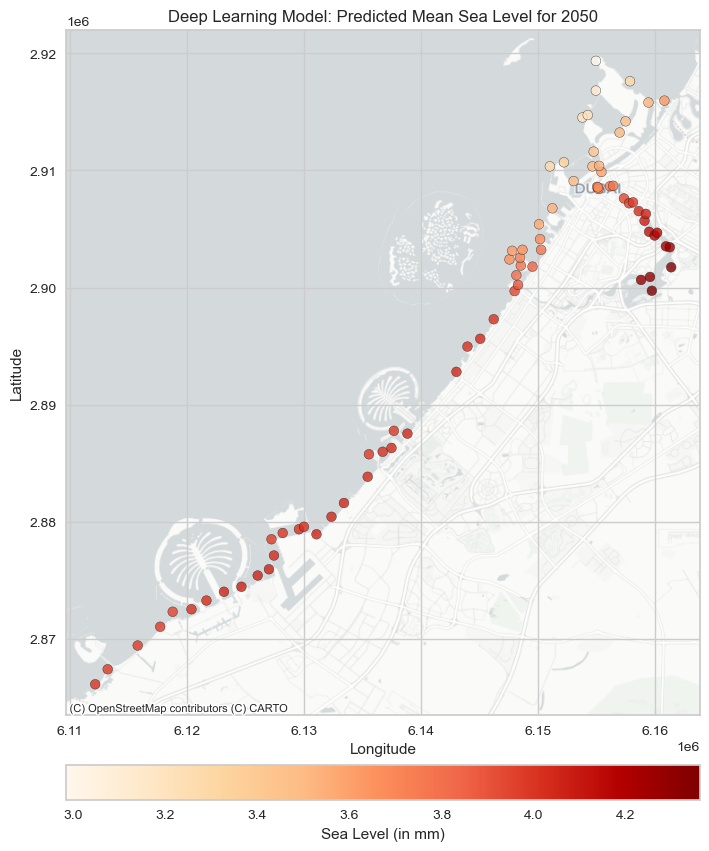

In [408]:
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

gdf_predictions = gpd.GeoDataFrame(
    input_df,
    geometry=gpd.points_from_xy(input_df['longitude'], input_df['latitude'] ),
    crs="EPSG:4326" 
)


gdf_predictions = gdf_predictions.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.5)

gdf_predictions.plot(ax=ax, marker='o', column='prediction_label', cmap = 'OrRd',
                     legend=True, alpha=0.8, edgecolor='k', cax=cax,legend_kwds={"label": "Sea Level (in mm)", "orientation": "horizontal"})

cx.add_basemap(ax, crs=gdf_predictions.crs.to_string(), source=cx.providers.CartoDB.Positron)

ax.set_title('Deep Learning Model: Predicted Mean Sea Level for 2050')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()
